In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
zscores = pd.read_csv(r'..\..\datasets\df_rob_zscores_most_common_ncm.csv', encoding='latin-1')
zscores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76457 entries, 0 to 76456
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nf_timestamp     76457 non-null  float64
 1   emit_lat         76457 non-null  float64
 2   emit_long        76457 non-null  float64
 3   prod_quant       76457 non-null  float64
 4   prod_valor_unit  76457 non-null  float64
dtypes: float64(5)
memory usage: 2.9 MB


In [60]:
ol_iforest = pd.read_csv(r'..\iforest\output\outliers.csv', encoding='latin-1')
ol_iforest.set_index('idx', inplace=True)
ol_iforest = ol_iforest.sort_values(by='anomaly_score', ascending=True)
iforest_idx = ol_iforest.index.values
zscores_iforest = zscores.loc[iforest_idx]
zscores_iforest = zscores_iforest.reindex(iforest_idx)
zscores_iforest

,nf_timestamp,emit_lat,emit_long,prod_quant,prod_valor_unit
71971,-1.387556,-5.955008,-3.437015,28.765876,-0.272788
71970,1.387102,-5.955008,-3.437015,14.316057,-0.274034
71964,-1.360883,-5.955008,-3.437015,11.064848,-0.273549
71968,-0.249724,-5.955008,-3.437015,35.990785,-0.274103
72083,1.695129,-2.721044,-2.712263,10.530205,-0.255901
...,...,...,...,...,...
73248,0.315112,-4.231275,-2.088403,4.032604,-0.261853
73301,0.507658,-4.231275,-2.088403,5.646167,-0.273134
73169,-0.132334,-4.231275,-2.088403,5.886997,-0.273826
46601,-1.374595,-4.562629,-1.309779,-0.127981,10.637680


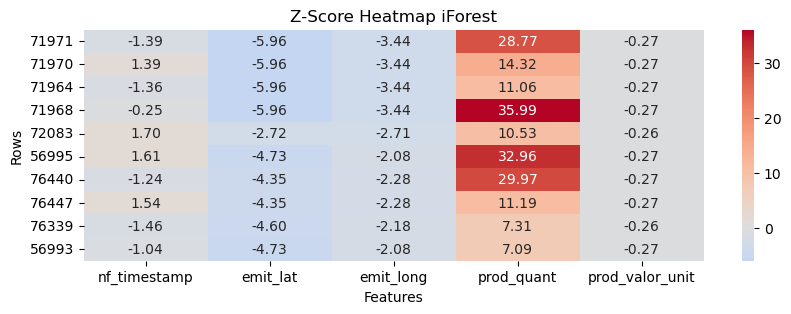

In [61]:
plt.figure(figsize=(10, 3))  # Set the figure size
sns.heatmap(zscores_iforest.head(10), center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap iForest')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()

In [62]:
ol_som = pd.read_csv(r'..\som\output\outliers.csv', encoding='latin-1')
ol_som.set_index('idx', inplace=True)
ol_som = ol_som.sort_values(by='anomaly_score', ascending=False)
som_idx = ol_som.index.values
zscores_som = zscores.loc[som_idx]
zscores_som = zscores_som.reindex(som_idx)
zscores_som

,nf_timestamp,emit_lat,emit_long,prod_quant,prod_valor_unit
7316,-1.156426,0.074147,0.391666,72.115330,-0.274657
7320,-0.878757,0.074147,0.391666,72.115330,-0.274657
26280,1.679771,0.074147,0.391666,48.032300,-0.274795
62178,-0.614986,-3.634229,-1.458559,48.032300,-0.273203
44440,-1.285344,-0.172324,0.621931,-0.133279,80.433533
...,...,...,...,...,...
72229,-1.229225,-2.721044,-2.712263,-0.132797,11.253176
72083,1.695129,-2.721044,-2.712263,10.530205,-0.255901
27944,0.152588,0.074147,0.391666,12.293083,-0.274588
70971,1.269877,-2.762958,-2.710404,-0.053564,7.136212


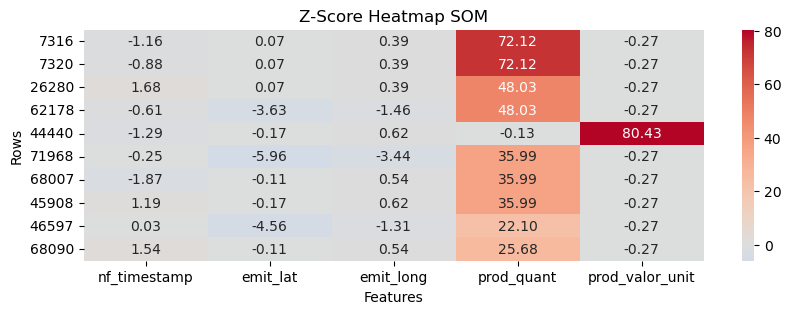

In [63]:
plt.figure(figsize=(10, 3))  # Set the figure size
sns.heatmap(zscores_som.head(10), center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap SOM')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()

In [64]:
ol_lof = pd.read_csv(r'..\lof\output\outliers.csv', encoding='latin-1')
ol_lof.set_index('idx', inplace=True)
ol_lof = ol_lof.sort_values(by='anomaly_score', ascending=True)
lof_idx = ol_lof.index.values
zscores_lof = zscores.loc[lof_idx]
zscores_lof = zscores_lof.reindex(lof_idx)
zscores_lof

,nf_timestamp,emit_lat,emit_long,prod_quant,prod_valor_unit
44440,-1.285344,-0.172324,0.621931,-0.133279,80.433533
49265,-1.013590,0.148470,0.633454,-0.132797,64.216565
63261,0.734372,-0.844751,-3.628101,-0.131352,58.651562
63260,0.506561,-0.844751,-3.628101,-0.133520,58.651562
63310,1.112449,-0.844751,-3.628101,-0.131593,58.651562
...,...,...,...,...,...
72036,-0.105248,3.043536,-5.361967,-0.133520,0.278757
72037,-0.105248,3.043536,-5.361967,-0.133520,0.305265
72033,-0.541586,3.043536,-5.361967,-0.133520,0.278757
72034,-0.541586,3.043536,-5.361967,-0.133520,0.305265


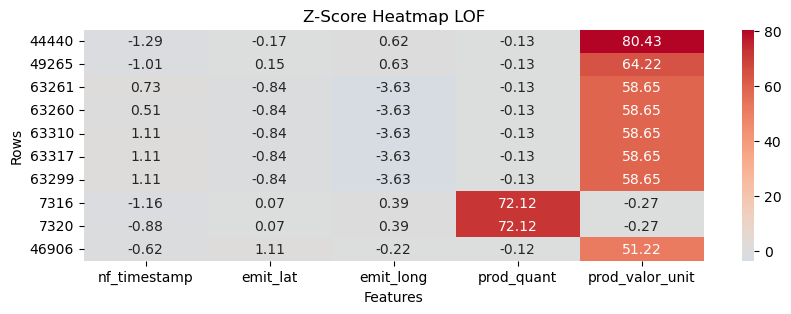

In [65]:
plt.figure(figsize=(10, 3))  # Set the figure size
sns.heatmap(zscores_lof.head(10), center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap LOF')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()

In [66]:
intersec = pd.read_csv(r'output\som_iforest_intersec.csv', encoding='latin-1')
intersec = intersec['idx']
zscores_intersec = zscores.loc[intersec]
zscores_intersec = zscores_intersec.reindex(intersec)
zscores_intersec

,nf_timestamp,emit_lat,emit_long,prod_quant,prod_valor_unit
idx,,,,,
46597,0.027621,-4.562629,-1.309779,22.097285,-0.270227
73222,0.662683,-4.231275,-2.088403,23.949270,-0.273826
72074,0.186906,-2.721044,-2.712263,10.920350,-0.255901
72075,0.186906,-2.721044,-2.712263,8.295300,-0.261091
72076,0.186906,-2.721044,-2.712263,7.091148,-0.254170
72083,1.695129,-2.721044,-2.712263,10.530205,-0.255901
76440,-1.235760,-4.348312,-2.279837,29.970027,-0.273688
76441,0.093087,-4.348312,-2.279837,19.132664,-0.270712
73243,-0.335568,-4.231275,-2.088403,8.295300,-0.273826


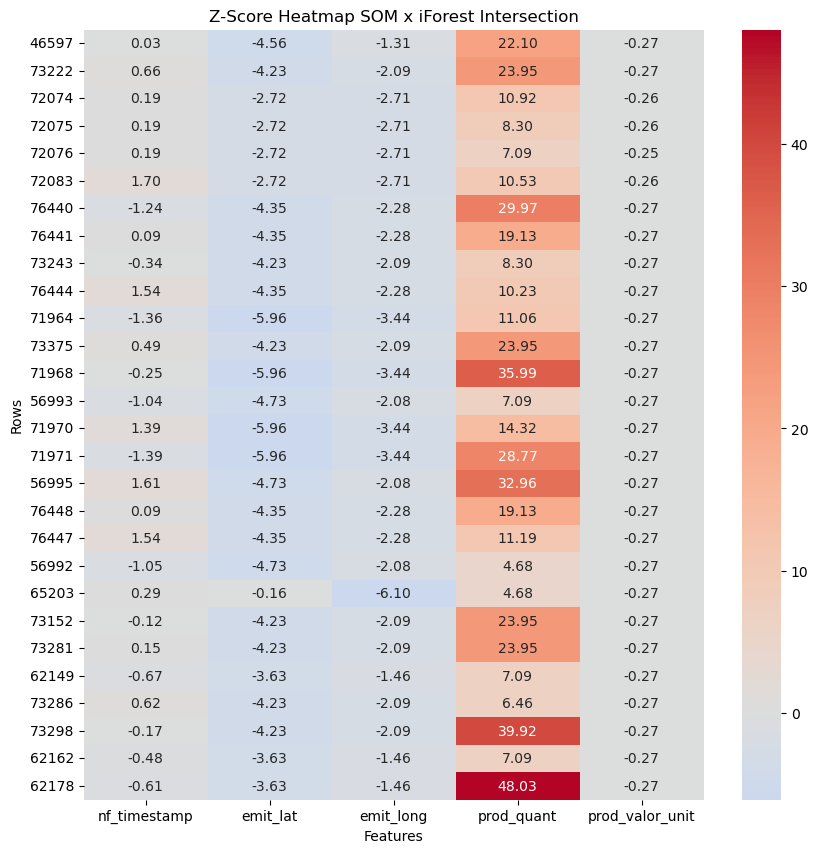

In [67]:
plt.figure(figsize=(10, 10))  # Set the figure size
sns.heatmap(zscores_intersec, center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap SOM x iForest Intersection')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()

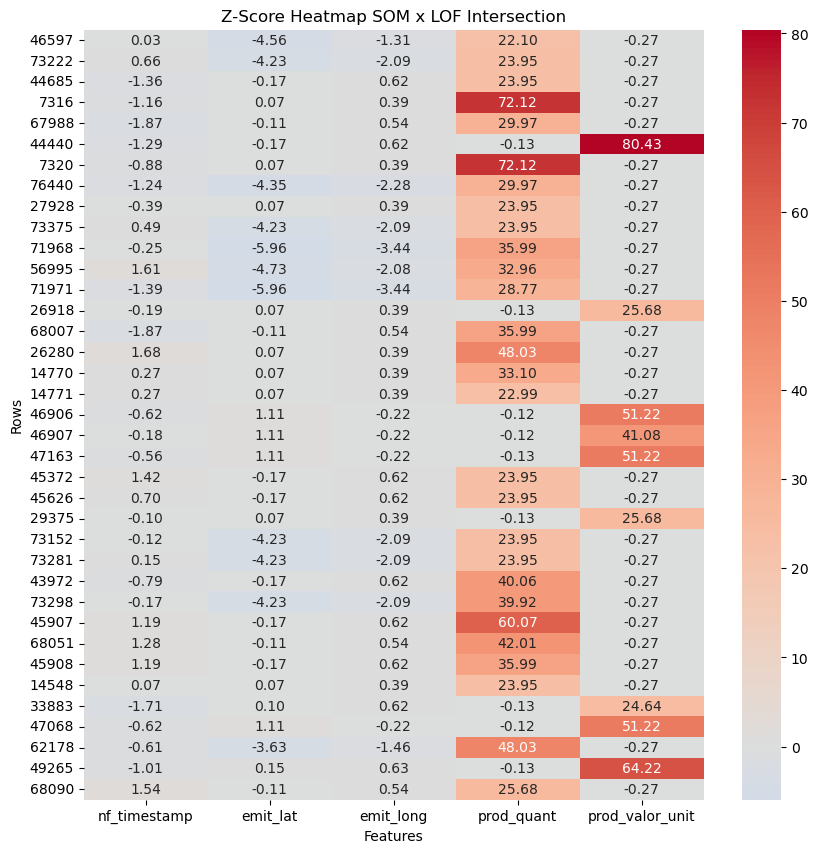

In [68]:
intersec = pd.read_csv(r'output\som_lof_intersec.csv', encoding='latin-1')
intersec = intersec['idx']
zscores_intersec = zscores.loc[intersec]
zscores_intersec = zscores_intersec.reindex(intersec)
zscores_intersec

plt.figure(figsize=(10, 10))  # Set the figure size
sns.heatmap(zscores_intersec, center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap SOM x LOF Intersection')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()

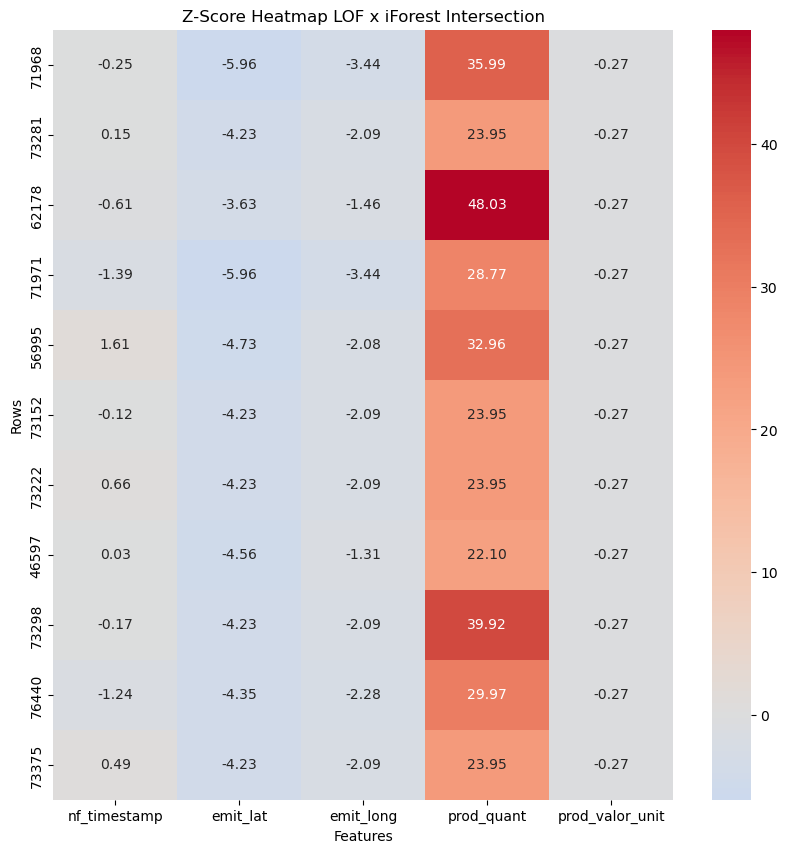

In [69]:
intersec = pd.read_csv(r'output\lof_iforest_intersec.csv', encoding='latin-1')
intersec = intersec['idx']
zscores_intersec = zscores.loc[intersec]
zscores_intersec = zscores_intersec.reindex(intersec)
zscores_intersec

plt.figure(figsize=(10, 10))  # Set the figure size
sns.heatmap(zscores_intersec, center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap LOF x iForest Intersection')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()

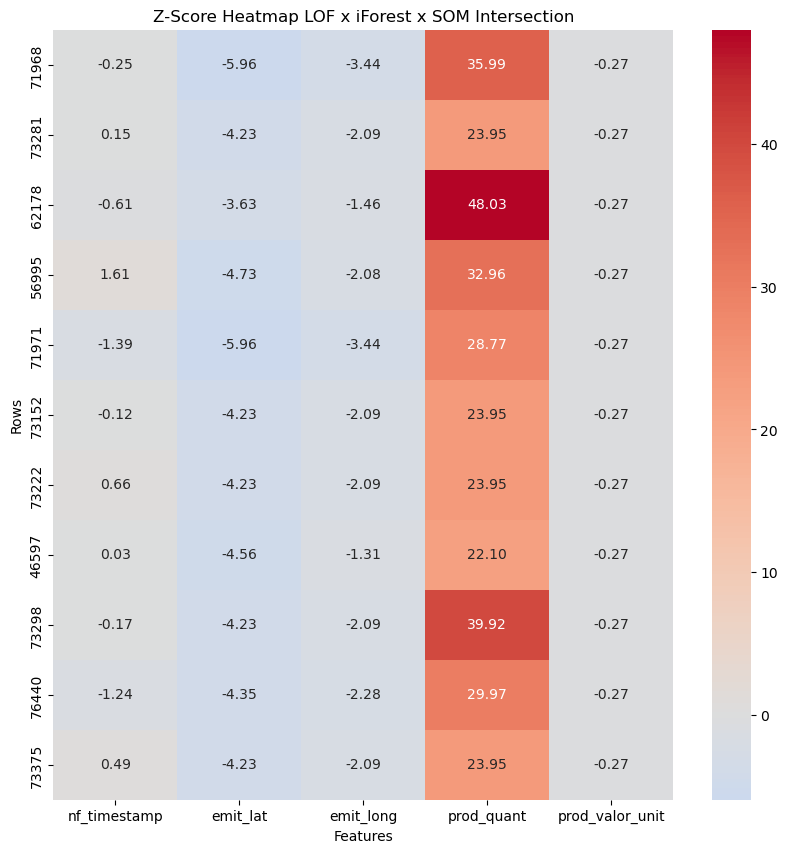

In [70]:
intersec = pd.read_csv(r'output\all_intersec.csv', encoding='latin-1')
intersec = intersec['idx']
zscores_intersec = zscores.loc[intersec]
zscores_intersec = zscores_intersec.reindex(intersec)
zscores_intersec

plt.figure(figsize=(10, 10))  # Set the figure size
sns.heatmap(zscores_intersec, center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap LOF x iForest x SOM Intersection')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()